下面我们用一个实例来学习下scikit-learn中的PCA类使用。为了方便的可视化让大家有一个直观的认识，我们这里使用了三维的数据来降维。  
首先我们生成随机数据并可视化，代码如下：

C:\Program1\2others\Anaconda\Anaconda3\lib\site-packages\matplotlib\collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Wall time: 1.18 s


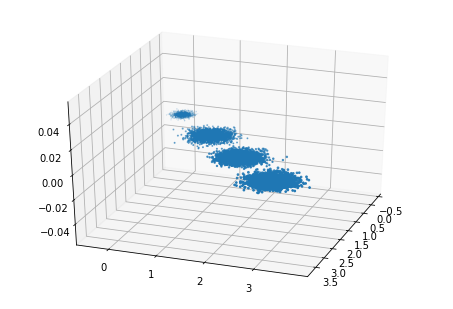

In [1]:
%%time
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

我们先不降维，只对数据进行投影，看看投影后的三个维度的方差分布，代码如下：

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
pca.explained_variance_ratio_
pca.explained_variance_

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([ 0.98318212,  0.00850037,  0.00831751])

array([ 3.78521638,  0.03272613,  0.03202212])

可以看出投影后三个特征维度的方差比例大约为98.3%：0.8%：0.8%。投影后第一个特征占了绝大多数的主成分比例。

现在我们来进行降维，从三维降到2维，代码如下：

In [3]:
pca = PCA(n_components=2)
pca.fit(X)
pca.explained_variance_ratio_
pca.explained_variance_

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([ 0.98318212,  0.00850037])

array([ 3.78521638,  0.03272613])

这个结果其实可以预料，因为上面三个投影后的特征维度的方差分别为：[ 3.78483785  0.03272285  0.03201892]，投影到二维后选择的肯定是前两个特征，而抛弃第三个特征。

为了有个直观的认识，我们看看此时转化后的数据分布，代码如下：

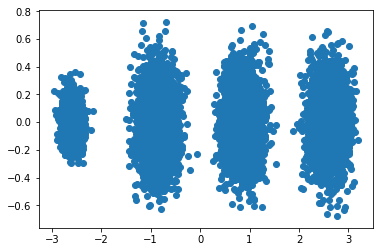

In [4]:
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

可见降维后的数据依然可以很清楚的看到我们之前三维图中的4个簇。  
现在我们看看不直接指定降维的维度，而指定降维后的主成分方差和比例。  
我们指定了主成分至少占95%，输出如下：

In [5]:
pca = PCA(n_components=0.95)
pca.fit(X)
pca.explained_variance_ratio_
pca.explained_variance_
pca.n_components_

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([ 0.98318212])

array([ 3.78521638])

1

可见只有第一个投影特征被保留。这也很好理解，我们的第一个主成分占投影特征的方差比例高达98%。只选择这一个特征维度便可以满足95%的阈值。我们现在选择阈值99%看看，代码如下：

In [12]:
pca = PCA(n_components=0.99)
pca.fit(X)
pca.explained_variance_ratio_
pca.explained_variance_
pca.n_components_

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([ 0.98318212,  0.00850037])

array([ 3.78521638,  0.03272613])

2

这个结果也很好理解，因为我们第一个主成分占了98.3%的方差比例，第二个主成分占了0.8%的方差比例，两者一起可以满足我们的阈值。